At the end of the experiment

* understand Multi-Layer Perceptron (MLP)
* tune the hyper-parameters of a MLP classifier

A hyperparameter is a parameter whose value is set before the learning process begins.

### What is  MLP ?


A multilayer perceptron is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes as shown in below image: 

**Layer1** :   Input Layer

**Layer 2** :  Hidden Layer

**Layer 3** : Output Layer

![alt text](https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)

The number of nodes in the input layer is determined by the dimensionality of our data. 

The number of nodes in the output layer is determined by the number of classes we have.


#### Importing the required packages

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.metrics import accuracy_score

Loading the dataset from sklearn package

In [ ]:
#Load MNIST datset 
digits = datasets.load_digits(n_class=10)
# Create our X and y data
data = digits.data
target = digits.target

In [ ]:
data.shape

(1797, 64)



Split  data into training ,testing  sets. This is done easily with SciKit Learn’s train_test_split function.




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(data, target, test_size=0.2, random_state=1)



In [ ]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf 
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

**Let us define the hyper parameters of MLP Classifier**

In [ ]:
# activation: Activation functions are critical in introducing non-linearity in MLP (in absence of this all layers of MLP combine into a single layer)
activation = ["identity","logistic","tanh","relu"]
#solvers: The following are the methods by which your weights get updated.
solvers = ["lbfgs","sgd","adam"]
#learning rate
learning_rate = [0.0001,0.001,0.01,0.1]
#hidden layers
hidden_layers = [(5,2),(3,2),(6,3),(7,2)]

In the below code cell we are trying to train a MLP classifer with different hyper parameters. Here we choose a random index value based on size of the hyper parameters list which are defined above.

In [ ]:
test_accuracy = []
validation_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(activation))
    k2 = np.random.randint(0,len(solvers))
    k3 = np.random.randint(0,len(learning_rate))
    k4 = np.random.randint(0,len(hidden_layers))
    print("\nHyper-parameters = \n activation = ", activation[k1],    "\n solver = ", solvers[k2], "\n learning_rate_init = ", learning_rate[k3],         "\n hidden_layer_sizes = ", hidden_layers[k4])
    #calling the mlp function with random hyper paramters
    clf = mlp(activation[k1],solvers[k2],hidden_layers[k4],learning_rate[k3])
    #Fitting the data into model
    clf.fit(X_train,Y_train)
    ## Predicting the values on trained model using train data
    predTrain = clf.predict((X_train))
    #Calculating the train accuracy
    train_accuracy.append(accuracy(Y_train,predTrain))
    # Predicting the values on trained model using test data
    predTest = clf.predict((X_test))
    #Calculating the test accuracy
    test_accuracy.append(accuracy(Y_test,predTest))
  
    print("(train,  test) accuracy = ",accuracy(Y_train,predTrain),  accuracy(Y_test,predTest))


Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)
(train,  test) accuracy =  0.791231732776618 0.7694444444444445

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(train,  test) accuracy =  0.8524704244954767 0.7916666666666666

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
(train,  test) accuracy =  0.7160751565762005 0.7027777777777777

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(train,  test) accuracy =  0.09394572025052192 0.11944444444444445

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.6931106471816284 0.6861111111111111

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(train,  test) accuracy =  0.3938761308281141 0.34444444444444444

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(train,  test) accuracy =  0.4022268615170494 0.4

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)
(train,  test) accuracy =  0.9102296450939458 0.8333333333333334

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(train,  test) accuracy =  0.6235212247738344 0.6416666666666667

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.4001391788448156 0.3638888888888889


#### Plotting the accuracies of  train, test  sets; On x-axis in the graph below (once the cell is executed), is the combination of parameters output by the cell above, in sequence.

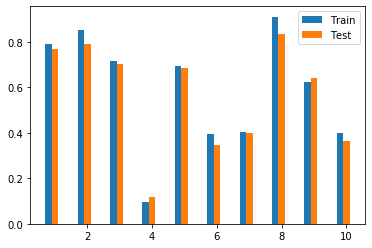

In [ ]:
## Plotting the data
xx = np.array(range(1,11))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx,test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()